In [1]:
#grid setup 

import numpy as np
import matplotlib.pyplot as plt

# Domain size (grid dimensions)

nx, ny = 100, 100                        # number of grid points
Lx, Ly = 2.0, 1.0                        # physical dimensions 
dx, dy = Lx / (nx - 1), Ly / (ny - 1)    # grid spacing

# Creating the mesh grid

x = np.linspace(0, Lx, nx)
y = np.linspace(0, Ly, ny)
X, Y = np.meshgrid(x, y)

# Defining the cylinder

# Cylinder parameters

cx, cy = 0.5, 0.5         # center of cylinder
radius = 0.1

# Create a mask where the cylinder exists

cylinder = (X - cx)**2 + (Y - cy)**2 < radius**2

# Initialize fields 

omega = np.zeros_like(X)
psi = np.zeros_like(X)


In [2]:
# define Jacobi Solver Function

def solve_poisson_jacobi(psi, omega, dx, dy, cylinder, max_iter=10000, tol=1e-5):
    ny, nx = psi.shape
    for it in range(max_iter):
        psi_old = psi.copy()

        # Jacobi update
        
        psi[1:-1, 1:-1] = 0.25 * (
            psi_old[1:-1, 2:] + psi_old[1:-1, :-2] +
            psi_old[2:, 1:-1] + psi_old[:-2, 1:-1] +
            dx**2 * (-omega[1:-1, 1:-1])
        )

        # Boundary conditions
        
        psi[0, :] = 0        # bottom
        psi[-1, :] = 0       # top
        psi[:, 0] = 0        # left
        psi[:, -1] = 0       # right
        psi[cylinder] = 0    # inside cylinder

        # Convergence check
        
        error = np.linalg.norm(psi - psi_old, ord=np.inf)
        if error < tol:
            print(f"Converged in {it} iterations")
            break
    else:
        print("Did not converge")
    return psi


In [3]:
psi = solve_poisson_jacobi(psi, omega, dx, dy, cylinder)


Converged in 0 iterations


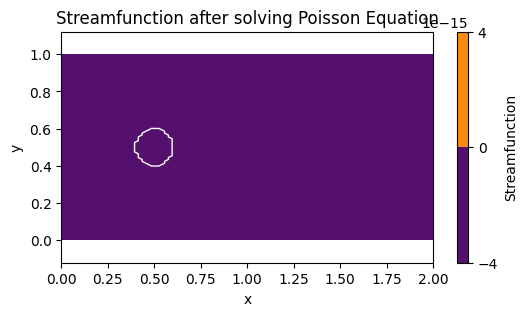

In [4]:
plt.figure(figsize=(6, 3))
plt.contourf(X, Y, psi, levels=50, cmap='inferno')
plt.colorbar(label="Streamfunction")
plt.contour(X, Y, cylinder, colors='white', linewidths=1)
plt.title("Streamfunction after solving Poisson Equation")
plt.xlabel("x")
plt.ylabel("y")
plt.axis("equal")
plt.savefig("streamfunction_plot.png", dpi=300, bbox_inches='tight')
plt.show()